This notebook illustartes how we can plot Spectrogram and Q-Transform Spectrogram in python using librosa.

First we begin by importing the necessary libraries.

In [1]:
import matplotlib.pyplot as plt

from librosa.display import specshow
import librosa

from scipy.io import wavfile
import numpy as np

%matplotlib inline

### Reading the wave file and plotting the waveform

We use scipy to read the waveform. The function returns the sampling rate and the actual data in wav file.

Sampling frequency: 11025


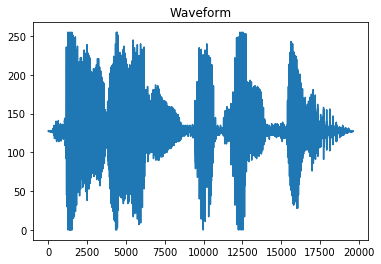

In [2]:
freq, data = wavfile.read('./audios/bogo.wav')
print('Sampling frequency:', freq)

data = data.astype(float)

plt.title('Waveform')
plt.plot(data)
plt.show()

### Plotting the spectrogram (STFT)

Next up we plot the fourier transform spectrogram.

In this plot we use linear scale for the frequency (y-axis).

/home/vaibhav/miniconda3/envs/speech/lib/python3.6/site-packages/librosa/core/spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


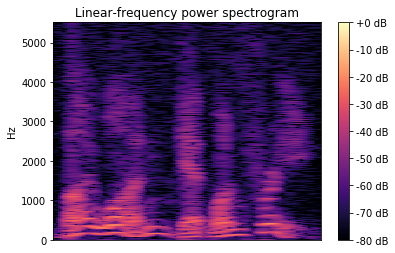

In [3]:
D = librosa.amplitude_to_db(librosa.stft(data, hop_length=128), ref=np.max)
librosa.display.specshow(D, y_axis='linear', sr=freq, hop_length=128, bins_per_octave=24)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

Human auditory senses percieve sound on a logarithmic scale of the frequency. So we plot the same spectrogram on a logarithmic scale.

This is one of the most popular visual repesentations of an audio.

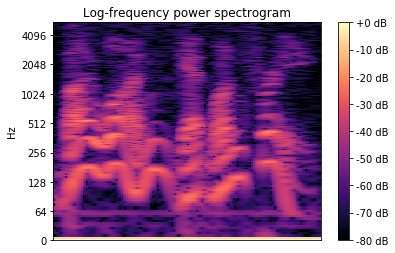

In [4]:
librosa.display.specshow(D, y_axis='log', sr=freq, hop_length=128, bins_per_octave=24)
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
plt.show()

### Plotting the Q Transform Spectrogram

Similar to the previous spectrogram, we plot this spectrogram in logarithmic scale of frequency.

/home/vaibhav/miniconda3/envs/speech/lib/python3.6/site-packages/librosa/core/spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


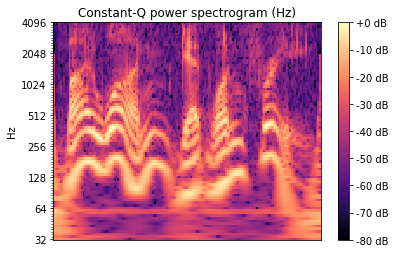

In [5]:
CQT = librosa.amplitude_to_db(librosa.cqt(data, sr=freq, hop_length=128), ref=np.max)
librosa.display.specshow(CQT, y_axis='cqt_hz', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')
plt.show()

#### Some useful links:

* https://librosa.github.io/librosa/generated/librosa.display.specshow.html
* https://librosa.github.io/librosa/generated/librosa.core.cqt.html
* https://librosa.github.io/librosa/generated/librosa.core.stft.html

The wavefiles are available free at:
http://www.wavsource.com/people/famous.htm